In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from load_data import get_trained_models
from constants import nz

In [2]:
device = torch.device("cpu")
G, D = get_trained_models()

In [6]:
DIFFICULT_CHARACTERS = {"m", "w"}

def generate_characters(s):
    lines = s.split('\n')
    num_lines = len(lines)
    words = [line.split(' ') for line in lines]
    # max length of any line
    max_chars = max(sum(len(word) for word in line_words) + len(line_words) - 1 for line_words in words)

    plt.figure(figsize=(3*max_chars, 3*num_lines))

    for line_idx, line_words in enumerate(words):
        char = 0
        for word_idx, word in enumerate(line_words):
            for i, c in enumerate(word):
                # translate character to label
                label = ord(c) - 97
                label = torch.tensor([label], dtype=torch.long, device=device)

                G.eval()  # Set the generator in evaluation mode
                D.eval()  # Set the discriminator in evaluation mode

                with torch.no_grad():
                    while True:
                        # generate noise
                        noise = torch.randn(1, nz, 1, 1, device=device)
                        # generate image
                        fake_image = G(noise, label)
                        # check image with D, only take the letter if the generator is
                        # sufficiently (still not very) certain the letter is real
                        output = D(fake_image, label).view(-1)
                        if output.item() > 0.15 or (c in DIFFICULT_CHARACTERS and output.item() > 0.0000):
                            break

                # Convert image data to numpy
                fake_image = fake_image.squeeze().cpu().detach().numpy()

                # display the image
                plt.subplot(num_lines, max_chars, line_idx * max_chars + char + 1)
                plt.imshow(fake_image, cmap='gray')
                plt.axis('off')
                char += 1

            # add a black image for space
            if word_idx != len(line_words) - 1:  # if not the last word, add a space
                black_image = np.zeros((28, 28))
                plt.subplot(num_lines, max_chars, line_idx * max_chars + char + 1)
                plt.imshow(black_image, cmap='gray')
                plt.axis('off')
                char += 1

        # pad with black images if the line isn't as long as the longest line
        while char < max_chars:
            black_image = np.zeros((28, 28))
            plt.subplot(num_lines, max_chars, line_idx * max_chars + char + 1)
            plt.imshow(black_image, cmap='gray')
            plt.axis('off')
            char += 1

    plt.subplots_adjust(wspace=0, hspace=0)  # remove spacing between plots
    plt.show()


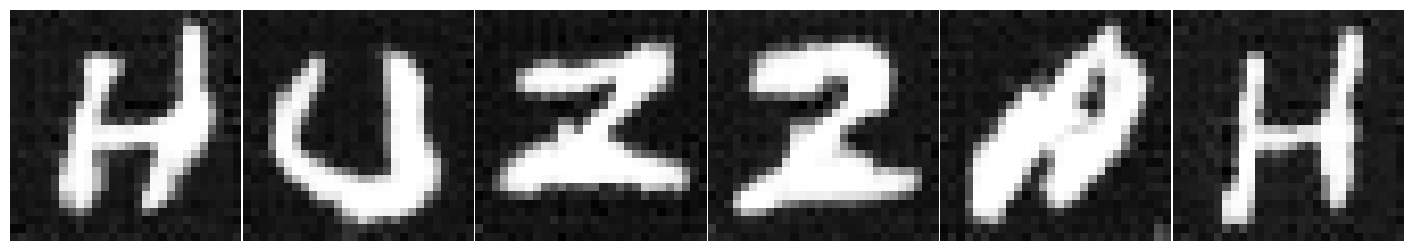

In [9]:
generate_characters("huzzah")